**Relax "adopted user" predictive model challenge**

**Import packages | Import datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#import two datasets as .csv; read as pandas dataframes
df_engagement = pd.read_csv("C:/Users/srubin/Desktop/Springboard/relax_challenge/takehome_user_engagement.csv")
df_users = pd.read_csv("C:/Users/srubin/Desktop/Springboard/relax_challenge/takehome_users.csv", engine='python')

**Exploring the dataset**

In [ ]:
#df_engagement dataset exploration
print(df_engagement.head())
print(" ")
print("dataframe shape: " + str(df_engagement.shape))
print(" ")
print("NaN values: " + str(df_engagement.isna().sum()))
print(" ")
print(df_engagement.dtypes)

In [6]:
print(df_engagement.info())
print("---------------")
print("unique values: " + str(df_engagement.user_id.unique))  #~12,000 unique 'user_id' values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ MB
None
---------------
unique values: <bound method Series.unique of 0             1
1             2
2             2
3             2
4             2
          ...  
207912    11996
207913    11997
207914    11998
207915    11999
207916    12000
Name: user_id, Length: 207917, dtype: int64>


In [7]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [9]:
#df_users dataset exploration
print("dataframe shape: " + str(df_users.shape))   #number of observations matches number of "user_id"
print("-----------")
print("NaN values: " + str(df_users.isna().sum()))
print("-----------")
print(df_users.dtypes)

dataframe shape: (12000, 10)
-----------
NaN values: object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64
-----------
object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object


*The two datasets have conflicting number of total observations*

*Will need to convert feature data types to datetime objects*


**Define: "adopted user" = user that has logged into the product three separate times in at least one seven-day period**

*what features relate to this?

how can the features and data be wrangled to indicate an "adopted user"

**Data Wrangling**

In [10]:
#convert "time stamp" to a Datetime object in df_engagement, day only value
df_engagement["time_stamp"] = pd.to_datetime(df_engagement["time_stamp"]).dt.strftime("%Y-%m-%d")
df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])

df_engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [11]:
#value_counts() for "visited"
df_engagement.visited.value_counts()  #"visited" values all equal to 1

1    207917
Name: visited, dtype: int64

In [12]:
#create a function to identify a user as "adopted" based on a 7-day window
seven_days = datetime.timedelta(7)
adopted_dict = {}

for user_id in sorted(list(df_engagement['user_id'].unique())):
    
    adopted_user = False
    temp = df_engagement[df_engagement['user_id'] == user_id]
    temp = temp.sort_values('time_stamp')
    
    for row in temp.itertuples():
        if adopted_user == True:
            continue
        this_time = temp._get_value(row[0], 'time_stamp')
        if len(temp[(temp['time_stamp'] >= this_time) & (temp['time_stamp'] <= (this_time + seven_days))]) >= 3:
            adopted_user = True
    
    adopted_dict[user_id] = adopted_user

In [13]:
print(len(adopted_dict), 'unique users.')   #8823 unique users based on id number

8823 unique users.


In [14]:
#create a side dataframe based on counts of the adopted_dict
from collections import Counter
counter_df = pd.DataFrame.from_dict(Counter(list(adopted_dict.values())), orient='index').reset_index()

In [15]:
print(counter_df)  
ratio = (1656 / (7167+1656)) *100
print(" ")
print("% adopted users: " + str(ratio))

   index     0
0  False  7167
1   True  1656
 
% adopted users: 18.769126147568855


In [16]:
#add new column in df_users for identifying a user as "adopted_user" True | False
df_users['adopted_user'] = False
df_users.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False


In [17]:
#for-loop over df_users re: adopted_user values per observation
for row in (df_users[np.logical_not(df_users['last_session_creation_time'].isnull())]).itertuples():
    adopted_value = adopted_dict[df_users._get_value(row[0],'object_id')]
    df_users._set_value(row[0], 'adopted_user',adopted_value)

In [18]:
ratio = len(df_users[df_users['adopted_user'] == True]) / len(df_users)
print("adopted_users out of total users: " + str((ratio) *100) + "%")

adopted_users out of total users: 13.8%


In [22]:
df_users.isna().sum()  #'last_session_creation_time' and "invited_by_user_id" have null-values

print("invited_by_user_id median, min, max values")
print("------")
print(df_users['invited_by_user_id'].median())
print(df_users['invited_by_user_id'].min())
print(df_users['invited_by_user_id'].max())  #ffill vs back-fill
col_ffill = ['invited_by_user_id']
df_users.loc[:,col_ffill] = df_users.loc[:,col_ffill].ffill()
print("---------")
print("Null values: " + str(df_users.isna().sum()))   #fill the na-values in "last_session_creation_time"

invited_by_user_id median, min, max values
------
5909.5
3.0
11999.0
---------
Null values: object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
adopted_user                     0
dtype: int64


In [ ]:
ffill1 = ['last_session_creation_time']
df.loc[:,ffill1] = df.loc[:,ffill1].ffill()

In [23]:
#convert "last_Session_creation_time" to datetime, rename to "creation_time"
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'])  
df_users['creation_time'] = pd.to_datetime(df_users['creation_time']).dt.strftime("%Y-%m-%d")
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'])
df_users.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
adopted_user                            bool
dtype: object

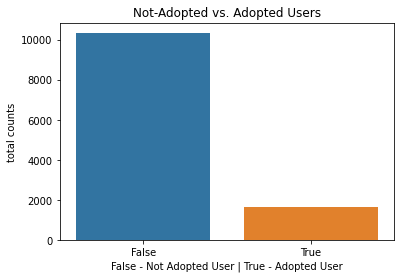

In [31]:
#visualization of non-adopted vs adopted users
sns.barplot(x=list(df_users['adopted_user'].value_counts().index), 
           y=df_users['adopted_user'].value_counts())
plt.ylabel("total counts")
plt.xlabel("False - Not Adopted User | True - Adopted User")
plt.title("Not-Adopted vs. Adopted Users")
plt.savefig("Adopted_vs.NonAdopted_count.png")

In [36]:
df_users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_user'],
      dtype='object')

In [37]:
#subset dataframe 
df = df_users[['object_id', 'creation_time', 'creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip', 'org_id', 'invited_by_user_id','adopted_user']]
df.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22,GUEST_INVITE,1,0,11,10803.0,False
1,2,2013-11-15,ORG_INVITE,0,0,1,316.0,True
2,3,2013-03-19,ORG_INVITE,0,0,94,1525.0,False
3,4,2013-05-21,GUEST_INVITE,0,0,1,5151.0,False
4,5,2013-01-17,GUEST_INVITE,0,0,193,5240.0,False


**Preprocessing discrete variables**

In [38]:
#categorical variable encoding: "creation_source"
df = pd.get_dummies(df, columns=['creation_source'])
df.head(2)

,object_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22,1,0,11,10803.0,False,1,0,0,0,0
1,2,2013-11-15,0,0,1,316.0,True,0,1,0,0,0


In [39]:
#train test split, define X, y
from sklearn.model_selection import train_test_split

X = df[['opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE','creation_source_PERSONAL_PROJECTS','creation_source_SIGNUP','creation_source_SIGNUP_GOOGLE_AUTH']]

y = df['adopted_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

X: 12000
y: 12000


In [41]:
#balancing the dataset for adopted/non-adopted users
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE(sampling_strategy='auto')

X_res, y_res = sm.fit_resample(X, y)

print(sorted(Counter(y_res).items()))

[(False, 10344), (True, 10344)]


C:\Users\srubin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


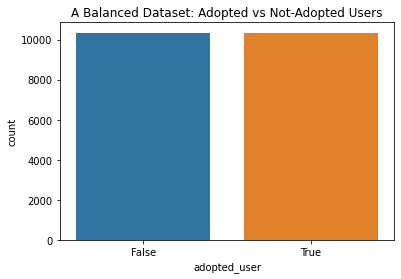

In [44]:
sns.countplot(y_res)
plt.title("A Balanced Dataset: Adopted vs Not-Adopted Users")
plt.savefig("Balanced_dataset_SMOTE.png")

**Model Development and Build**

In [45]:
#import multiple m/l models, packages, and metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm

In [46]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LogReg', LogisticRegression()))
models.append(('DT',DecisionTreeClassifier() ))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [47]:
names = []
scores = []

for name, model in tqdm(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:10<00:00,  1.55s/it]

     Name     Score
0     KNN  0.844167
1     SVC  0.861111
2  LogReg  0.861111
3      DT  0.769444
4     GNB  0.860833
5      RF  0.833611
6     GBC  0.860278


In [48]:
#cross validation with n_splits-5
names = []
scores = []

for name, model in tqdm(models):
    k_fold = KFold(n_splits=5, random_state=42, shuffle=True)
    score = cross_val_score(model, X,y, cv=k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

cross_val = pd.DataFrame({'Model_Name': names, 'Model_Scores': scores})
print(cross_val)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:58<00:00,  8.33s/it]

  Model_Name  Model_Scores
0        KNN      0.842833
1        SVC      0.862000
2     LogReg      0.862000
3         DT      0.774250
4        GNB      0.862000
5         RF      0.832500
6        GBC      0.861583


In [49]:
#cross validation with n_splits-10
names = []
scores = []

for name, model in tqdm(models):
    k_fold = KFold(n_splits=10, random_state=42, shuffle=True)
    score = cross_val_score(model, X,y, cv=k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

cross_val = pd.DataFrame({'Model_Name': names, 'Model_Scores': scores})
print(cross_val)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:53<00:00, 16.16s/it]

  Model_Name  Model_Scores
0        KNN      0.845000
1        SVC      0.862000
2     LogReg      0.862000
3         DT      0.775750
4        GNB      0.862000
5         RF      0.830000
6        GBC      0.861667


**Select LogReg and Gausiian models because they the highest 2/3 scores after cross-validation on n_folds-10**

In [53]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
predictions = LogReg.predict(X_test)
LogReg_score = LogReg.score(X_test, y_test)
print(LogReg_score)
print("----------")
cm = confusion_matrix(y_test, predictions)
print(cm)

0.8611111111111112


<AxesSubplot:>

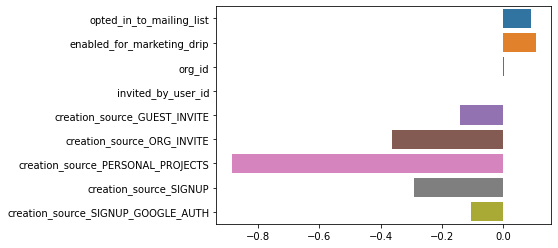

In [58]:
#Logistic Regression feature importance
importance = LogReg.coef_[0]
features = pd.Series(importance, index=X.columns)
sns.barplot(y=X.columns, x=importance)

In [60]:
#parameter tuning
param_test = {'C':[0.001,0.01,0.1,1,10,100,1000]}
gridSearch = GridSearchCV(LogisticRegression(penalty='l2'), param_test)
gridSearch.fit(X_train, y_train)
gridSearch.fit(X_train,y_train)

print(gridSearch.best_params_, gridSearch.best_score_)

{'C': 0.001} 0.8623809523809524


In [61]:
print(gridSearch.score(X_train, y_train))
print(" ")
print(gridSearch.score(X_test, y_test))

0.8623809523809524
 
0.8611111111111112


In [62]:
#GNB modeling
GBC = GradientBoostingClassifier(verbose=True)
GBC.fit(X_train, y_train)
print("GBC Train Score: " + str(GBC.score(X_train, y_train)))
print("-----------")
print("GBC Test Score: " + str(GBC.score(X_test, y_test)))

      Iter       Train Loss   Remaining Time 
         1           0.7983            1.38s
         2           0.7958            1.67s
         3           0.7937            1.70s
         4           0.7920            1.62s
         5           0.7905            1.63s
         6           0.7891            1.62s
         7           0.7877            1.60s
         8           0.7866            1.59s
         9           0.7855            1.57s
        10           0.7845            1.53s
        20           0.7767            1.30s
        30           0.7712            1.13s
        40           0.7672            0.95s
        50           0.7639            0.80s
        60           0.7602            0.63s
        70           0.7568            0.47s
        80           0.7526            0.31s
        90           0.7492            0.16s
       100           0.7461            0.00s
GBC Train Score: 0.8635714285714285
-----------
GBC Test Score: 0.8602777777777778


In [63]:
#GBC confusion matrix
confusion_matrix(y_test, GBC.predict(X_test))

array([[3097,    3],
       [ 500,    0]], dtype=int64)

Shape of GBC features: (9,)


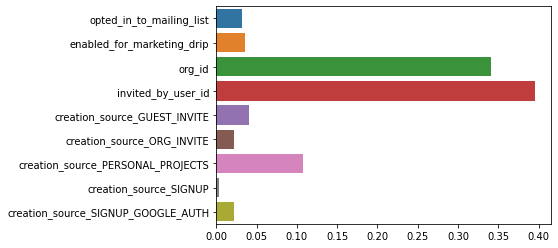

In [68]:
print("Shape of GBC features: " + str(GBC.feature_importances_.shape))

features = pd.Series(GBC.feature_importances_, index=X.columns)
sns.barplot(y=X.columns, x=GBC.feature_importances_)
plt.savefig("GBC Feature Importance.png")

In [72]:
GBC_paramTest = {'n_estimators':range(20,81,10)}
GBC_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                                min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=8,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=42), 
param_grid = GBC_paramTest, scoring='roc_auc',n_jobs=4, cv=10)

GBC_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=42,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [76]:
print( GBC_search.best_params_, GBC_search.best_score_)

{'n_estimators': 20} 0.5777882294350063


In [77]:
GBC_tuned = GradientBoostingClassifier(learning_rate=0.05, 
                                      n_estimators=20,
                                      max_features='auto',
                                      subsample=0.85,
                                      max_depth=8,
                                      min_samples_split=500,
                                      random_state=42,
                                      verbose=True)

In [78]:
GBC_tuned.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7922           0.0023            0.69s
         2           0.7903           0.0015            0.55s
         3           0.7886           0.0012            0.52s
         4           0.7930           0.0007            0.51s
         5           0.7822           0.0007            0.47s
         6           0.7908           0.0005            0.44s
         7           0.7836           0.0001            0.41s
         8           0.7774           0.0004            0.37s
         9           0.7833          -0.0002            0.34s
        10           0.7729          -0.0004            0.31s
        20           0.7578          -0.0003            0.00s


GradientBoostingClassifier(learning_rate=0.05, max_depth=8, max_features='auto',
                           min_samples_split=500, n_estimators=20,
                           random_state=42, subsample=0.85, verbose=True)

In [79]:
print("GBC_tuned train score: " + str(GBC_tuned.score(X_train, y_train)))
print("--------")
print("GBC_tuned test score: " + str(GBC_tuned.score(X_test, y_test)))

GBC_tuned train score: 0.8623809523809524
--------
GBC_tuned test score: 0.8611111111111112


**Conclusions & Discussion**

The "relax" product has ~86% "adopted users" based on the given dataset. The goal is improving the rate of "adopted users" by first predicting that most critical features for predicting which users will become "adopted". There is strong evidence that if a user was invited by another user to use the "relax" product they will more likely become an adopted user, as indicated most obviously by the Gradient Boosting Classifier. In addition, both models selected suggest if they signed up for the marketing options, they would have increased changes of becoming an "adopted user."The features relating to where the users signed up - "creation_source" - had minimal impact. 

Testing both Logistic Regression and Gradient Boosting Classifier models had similar accuracy scores (~86%), suggesting these predictive models are strongly predictive already. To improve model accuracy, incorporating more demographic features of the users and incorporating finer details of the date and time of the user signup information may provide improvements without further model tuning. 

My recommendation would be to focus on the origin of how the users signed up and focus on marketing and providing more opportunities for existing users to promote new users through recommendations.
